Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10

****************

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
y_test_show = y_test.copy()
class_names = ['самолет', 'автомобиль', 'птица', 'кот', 'олень',
               'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

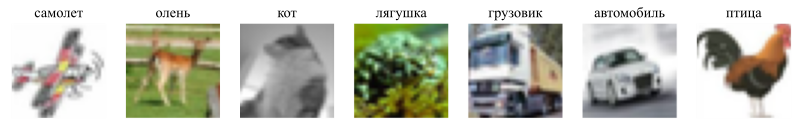

In [5]:
sample = [1211, 3445, 5744, 899, 1, 119, 1818]
N = len(sample)
plt.figure(figsize=(2 * N, 5))
for num, i in enumerate(sample, 1):
    plt.subplot(1, N, num)
    plt.imshow(X_train[i, :, :, :],)
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[y_train[i][0]])
    plt.grid(False)
plt.show()

In [6]:
# нормализация
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [7]:
NUM_EPOCHS = 100
BATCH_SIZE = 4096

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(buffer_size=X_train.shape[0])
train_ds = train_ds.repeat(5)
train_ds = train_ds.batch(BATCH_SIZE)


In [8]:
class Model(tf.keras.Model):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')
        self.conv2 = Conv2D(64, (2, 2), activation='relu', padding='same')
        self.conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')
        self.conv4 = Conv2D(128, (2, 2), activation='relu', padding='same')
        self.conv5 = Conv2D(256, (2, 2), activation='relu', padding='same')
        self.dropout1 = Dropout(0.5)
        self.dropout2 = Dropout(0.25)
        self.dropout3 = Dropout(0.1)
        self.fc1 = Dense(384, activation='relu')
        self.fc2 = Dense(256, activation='relu')
        self.fc3 = Dense(10, activation='softmax')
        self.max_pool = MaxPooling2D((2, 2), (2, 2))
        self.flatten = Flatten()
        
    def call(self, inp):
        
        out = self.conv1(inp)
        out = self.max_pool(out)
                
        out = self.conv2(out)
        out = self.max_pool(out)
        out =self.dropout2(out)
    
        out = self.conv3(out)
        out = self.max_pool(out)
        
        out = self.conv4(out)
        out = self.max_pool(out)
        out =self.dropout2(out)
        
        out = self.conv5(out)
        out = self.max_pool(out)
        out =self.dropout2(out)

        out = self.flatten(out)
        out = self.fc1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.dropout3(out)
        out = self.fc3(out)
        
        return out

In [9]:
optimizer = Adam(learning_rate=0.001)
model = Model()
model.compile(optimizer=optimizer,
              loss=sparse_categorical_crossentropy, metrics=['accuracy'])

In [10]:
m_history = model.fit(train_ds, epochs=NUM_EPOCHS, 
          validation_data=(X_test, y_test), verbose=0)

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7784 - accuracy: 0.8040


[0.7784335017204285, 0.8040000200271606]

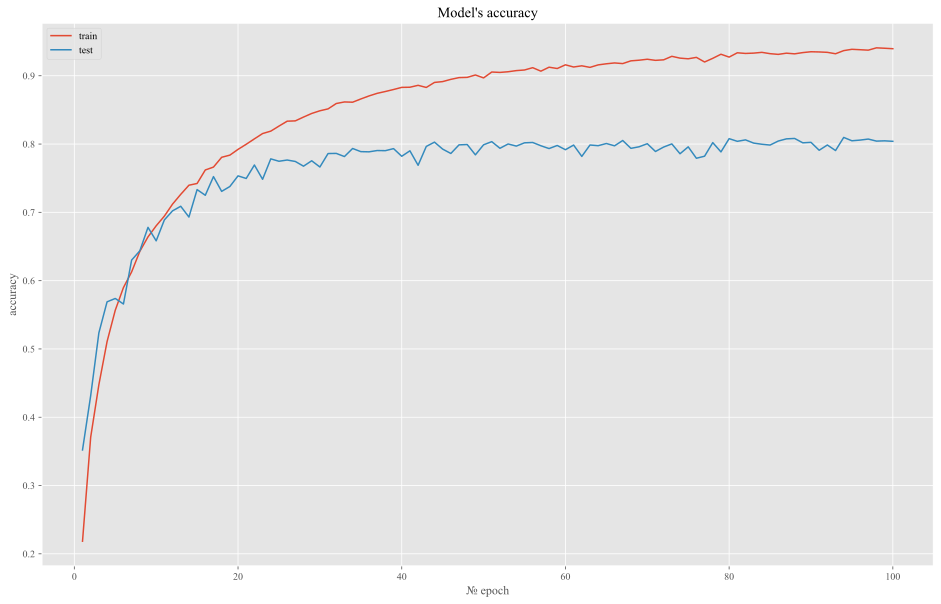

In [12]:
x = np.arange(1, NUM_EPOCHS+1, 1)
plt.figure(figsize=(16, 10))
plt.plot(x, m_history.history['accuracy'], label='train')
plt.plot(x, m_history.history['val_accuracy'], label='test')
plt.legend(loc='best')
plt.xlabel('№ epoch')
plt.ylabel("accuracy")
plt.title("Model's accuracy")
plt.show()

In [13]:
y_pred = model.predict(X_test)
y_lbl = np.argmax(y_pred, axis=1)

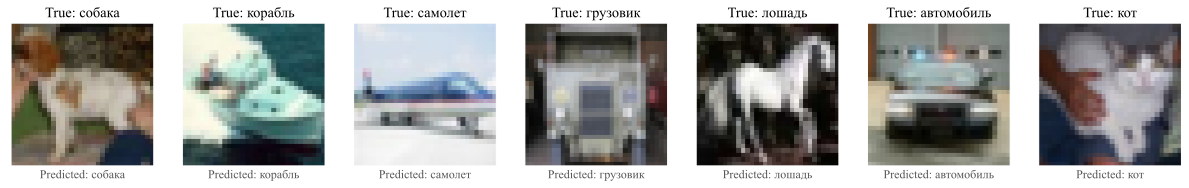

In [14]:
sample = [12, 144, 524, 707, 13, 66, 77]
N = len(sample)
plt.figure(figsize=(3 * N, 5))
for num, i in enumerate(sample, 1):
    plt.subplot(1, N, num)
    plt.imshow(X_test[i, :, :, :],)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f'Predicted: {class_names[y_lbl[i]]}')
    plt.title(f'True: {class_names[y_test_show[i][0]]}')
    plt.grid(False)
plt.show()